<AxesSubplot:>

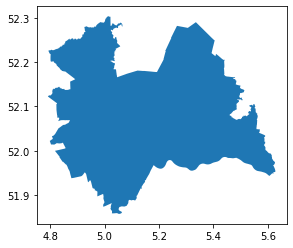

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import csv
from shapely import geometry


query = {'state': 'Utrecht'}

# get the boundaries of the place
utrecht_boundary = ox.geocode_to_gdf(query)
utrecht_boundary.plot()


In [2]:
postcodes = pd.read_excel('data/Consumenten_data/Postcodes Provincie Utrecht.xlsx') 
plaats = postcodes['Plaats'].unique()
postcodes.head()

,Postcode,Gemeente,Plaats,Aantal inwoners?
0,1390,De Ronde Venen,Abcoude,NaN
1,1391,De Ronde Venen,Abcoude,NaN
2,1393,Stichtse Vecht,Nigtevecht,NaN
3,1396,De Ronde Venen,Baambrugge,NaN
4,1426,De Ronde Venen,de Hoef,NaN


In [3]:
gemeente_boundaries = {}
# fig,ax = plt.subplots()
# utrecht_boundary.plot(ax=ax,color='b')
for gemeente in plaats:
    query= gemeente+",Utrecht, The Netherlands"
    gdf = ox.geocode_to_gdf( query)
    gemeente_boundaries[gemeente] = gdf


In [19]:
farm_buildings = ['farm','barn','conservatory','cowshed','farm_auxiliary','greenhouse','slurry_tank','stable','sty']

building = ox.geometries.geometries_from_polygon(gemeente_boundaries['Bunnik'].geometry[0],{'building':farm_buildings})
farm = ox.geometries.geometries_from_polygon(gemeente_boundaries['Bunnik'].geometry[0],{'landuse':['farmyard']})

/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

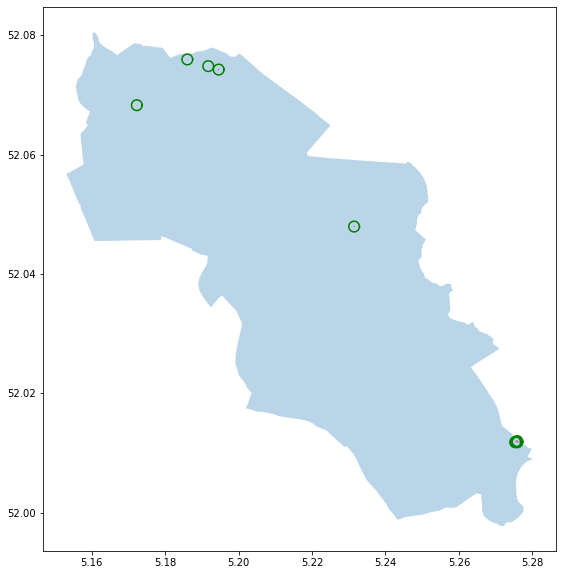

In [36]:
from shapely.geometry import Point, Polygon
import geog

fig,ax=plt.subplots(figsize=(10,10))
building.plot(ax=ax,color='r')
for i,row in building.iterrows():
    centre = row.geometry.centroid
    
    n_points = 20
    d = 100  # meters
    angles = np.linspace(0, 360, n_points)
    polygon = geog.propagate(centre, angles, d)
    buffer_poly = Polygon(polygon)
    ax.plot(buffer_poly.exterior.coords.xy[0], buffer_poly.exterior.coords.xy[1],color='g')

  
gemeente_boundaries['Bunnik'].plot(ax=ax,alpha=0.3)

In [22]:
building

/Users/lisatostrams/opt/anaconda3/envs/ox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,unique_id,osmid,element_type,nodes,building,ref:bag,source,source:date,start_date,geometry,height,building:levels,note
0,way/57928587,57928587,way,"[718761601, 718767155, 718763934, 718759301, 7...",barn,312100000002503,BAG,2014-05-07,1960,"POLYGON ((5.18601 52.07601, 5.18610 52.07593, ...",NaN,NaN,NaN
1,way/57928709,57928709,way,"[2867006294, 718758093, 718759064, 718760215, ...",farm_auxiliary,312100000000874,BAG,2014-05-07,1970,"POLYGON ((5.19167 52.07485, 5.19173 52.07486, ...",2.5,NaN,NaN
2,way/57930421,57930421,way,"[718741559, 2847864207, 2847864206, 718759308,...",farm,312100000004898,BAG,2017-12-12,1947,"POLYGON ((5.27618 52.01178, 5.27562 52.01206, ...",NaN,NaN,NaN
3,way/57930680,57930680,way,"[2879180681, 2879180672, 718762646, 2879180693...",barn,312100000001133,BAG,2014-05-25,1960,"POLYGON ((5.23160 52.04790, 5.23151 52.04787, ...",NaN,NaN,NaN
4,way/57931417,57931417,way,"[718748001, 718766917, 718767800, 718749227, 7...",farm_auxiliary,NaN,3dShapes,NaN,NaN,"POLYGON ((5.17219 52.06830, 5.17228 52.06832, ...",NaN,1,NaN
5,way/280726752,280726752,way,"[2847864084, 2847864099, 2847864202, 284786408...",farm_auxiliary,312100000004901,BAG,2014-05-07,1988,"POLYGON ((5.27610 52.01166, 5.27568 52.01187, ...",NaN,NaN,NaN
6,way/280726753,280726753,way,"[2847864094, 2847864098, 2847864201, 284786409...",farm_auxiliary,312100000004896,BAG,2017-12-12,1988,"POLYGON ((5.27556 52.01182, 5.27547 52.01186, ...",NaN,NaN,NaN
7,way/280726782,280726782,way,"[2847864093, 2847864091, 2847864092, 284786410...",farm,312100000004897,BAG,2017-12-12,1988,"POLYGON ((5.27520 52.01174, 5.27525 52.01179, ...",NaN,NaN,NaN
8,way/282762225,282762225,way,"[2867006288, 2867006292, 2867006293, 286700629...",stable,312100000000432,BAG,2014-05-07,1970,"POLYGON ((5.19453 52.07413, 5.19439 52.07434, ...",NaN,NaN,Hoort bij Hoenderiklaan 2
